In [1]:
#---------------------- Header 
from easydict import EasyDict
import os
import json
args = EasyDict()

#------ image list 
i_1 = "/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/K3_20230328042158_57944_09401261_L1G_PS/0-Pusan-2023-AO_10_K3_20230328042158_57944_09401261_L1G_PS.png"

#------ tif list 
t_1 = "/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/K3_20230328042158_57944_09401261_L1G_PS/K3_20230328042158_57944_09401261_L1G_PRGB.tif"

#------ Coordinates filtering function
args.txt_path = None

args.xml_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/K3_20230328042158_57944_09401261_L1G_PS/K3_20230328042158_57944_09401261_L1G_Aux.xml"


#------ gpu
args.gpu_id = 0

#------ model 
args.img_path = i_1

print( '/'.join( args.img_path.split("/")[0:-1]) )
args.infer_threshold = 0.2
args.infer_threshold_showing = 0.2
source_root ='/'.join( args.img_path.split("/")[0:-1])

args.img_output = args.img_path.replace(".png" ,"_output_v1_0130.png")
args.img_output_masked = args.img_path.replace(".png" ,"_output_v1_0130_Masked.png")
args.img_output_scatter = args.img_path.replace(".png" ,"_output_v1_0130_Scatter.png")

args.csv_output = args.img_path.replace(".png","_output_v1_0130.csv")
args.csv_output_masked =args.img_path.replace(".png","_masked_v1_0130.csv")
args.csv_output_scatter = args.img_path.replace(".png","_scatter_v1_0130.csv")


#------ Map Shape 
# old mask
#args.map_path = os.path.join(source_root, "map")
#args.map_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/Shape_Old"
# new mask 
args.map_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/Shape_Korea_Clipped"


#------ TIF 
args.tf_path = t_1

# time 2023 05 23 04 50 50
args.year_= int( i_1 .split("/")[-2].split("_")[1][0:4])
args.month_ = int(i_1 .split("/")[-2].split("_")[1][4:6])
args.day_ = int(i_1 .split("/")[-2].split("_")[1][6:8])
hour_ = int(i_1 .split("/")[-2].split("_")[1][8:10])
args.hour_ = hour_ + 9
args.min  = int(i_1 .split("/")[-2].split("_")[1][10:12]) 
args.sec =  0
print("time : ", args.year_, args.month_, args.day_, args.hour_, args.min)

#------ AIS csv ---------------------------------------------------------------------------

ais_root_1 = "/mnt/hdd/eric/.tmp_ipy/00.Data/AIS-CSV-NTO-AO/1차-3개"
ais_root_2 = "/mnt/hdd/eric/.tmp_ipy/00.Data/AIS-CSV-NTO-AO/2차-11개"

if str(args.year_) == "2022":
    ais_root = ais_root_1
elif str(args.year_) == "2023":
    ais_root = ais_root_2


#-------
if len(str(args.month_)) ==1:
    args.month_ = str("0") + str(args.month_)

if len(str(args.day_)) ==1:
    args.day_ = str("0") + str(args.day_)

print(str(args.year_)+str(args.month_)+str(args.day_)+str(args.hour_)+str("00_dynamic.csv"))
csv_name = str(args.year_)+str(args.month_)+str(args.day_)+str(args.hour_)+str("00_dynamic.csv")
args.data_path = os.path.join( ais_root , csv_name)
print(args.data_path)
if os.path.exists(args.data_path):
    print("#------------------ : csv exists")
else:
    print("#------------------ : no csv found")

args.static_data_path = args.data_path.replace("_dynamic.csv","_static.csv")
args.final_merge = args.img_path.replace(".png",".csv")

# time gap
# 시각화 결과물에서 ais 좌표가 해상도가 더 높아지게 된다. 
args.time_gap_min = 5
args.time_gap_sec = False

#--------------------------------------------------------------------------------------------

# pixel gap 
# this is for visualization
args.pixel_gap = 200

# # latlon gap 
# # 매칭되는 박스와 ais 간의 기준 => 늘리면 R_ 데이터프레임에서 매칭 케이스가 늘어나게 된다. 
# args.latlon_gap = 0.000001

#------ Model Inference 
args.model_test = False
args.Box_Matching = True
args.png_draw_save = False


# Save EasyDict to a file
file_path = os.path.join(source_root ,"config.json" )
with open(file_path, 'w') as json_file:
    json.dump(args, json_file, indent=4)

/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/K3_20230328042158_57944_09401261_L1G_PS
time :  2023 3 28 13 21
202303281300_dynamic.csv
/mnt/hdd/eric/.tmp_ipy/00.Data/AIS-CSV-NTO-AO/2차-11개/202303281300_dynamic.csv
#------------------ : csv exists


In [2]:
# # get time

# from PIL import Image
# from PIL.TiffTags import TAGS

# with Image.open(args.tf_path ) as img:
#     meta_dict = {TAGS[key] : img.tag[key] for key in img.tag}

# import rasterio
# meta_dict_r = rasterio.open(args.tf_path)

In [3]:
# '''
# raterio 로, tif 에서 spatial-resolution 찾는 방법
# 아니면 그냥 xml 들어가서 "gsd" 로 키워드 찾으면 나온다. 


# Metadata:
  
#   TIFFTAG_RESOLUTIONUNIT=2 (pixels/inch)

# '''

# meta_dict_r.res



In [4]:
from datetime import datetime

# Your input string
input_string =  str(args.year_) + str(args.month_) + str(args.day_) + str(args.hour_) +  str(args.min)

# Specify the format of the input string
input_format = "%Y%m%d%H%M"

# Convert the string to a datetime object
datetime_object = datetime.strptime(input_string, input_format)

# Now you have a datetime object, and you can work with it as needed
print(datetime_object)


2023-03-28 13:21:00


In [5]:
input_string

'202303281321'

In [6]:
from PIL import Image
Image.MAX_IMAGE_PIXELS = 933120000
from adjustText import adjust_text

# Draw image 
img_path = args.img_path
img_ = Image.open(img_path)

/mnt/hdd/eric/.conda/envs/8.tmp/lib/python3.8/site-packages/PIL/Image.py:3176: DecompressionBombWarning: Image size (1014132288 pixels) exceeds limit of 933120000 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [7]:
img_.size

(36712, 27624)

In [8]:
!nvidia-smi

Tue Jan 30 18:02:52 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3090        On  | 00000000:3B:00.0 Off |                  N/A |
|  0%   29C    P8              32W / 350W |     12MiB / 24576MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# 1. Model Inference

In [9]:
import testModule

#0-Pusan-2023-AO_10_K3_20230328042158_57944_09401261_L1G_PS

if args.model_test:
    result = testModule.infer_model(input_file_path=args.img_path,\
                        thres=args.infer_threshold , gpu_id = 0)

#------------------------
# result save
import numpy as np
import os 
save_root = "/mnt/hdd/eric/.tmp_ipy/00.Data/Inference_results"
file_name = args.img_path.split("/")[-1].split(".")[0]+".npy"    

if args.model_test == False:
    result = np.load(os.path.join(save_root,file_name))
else:
    print("Result Saved")
    np.save(os.path.join(save_root,file_name), result)

# 2. AIS csv 

- time condition 에 맞게 filtering 

In [10]:
import pandas as pd

df = pd.read_csv(args.data_path)

In [11]:
#---- current time ----#
import datetime
year_= args.year_
month_ = args.month_ 
day_ = args.day_
hour_ = args.hour_
min  = args.min
sec =  args.sec
crit_time_str = f"{year_}-{month_}-{day_} {hour_}:{min}:{sec}"
date = pd.to_datetime(crit_time_str)

#---- time condition ----#
time_gap_min = args.time_gap_min
time_gap_sec = args.time_gap_sec

earl_time = date - datetime.timedelta(minutes=time_gap_min,seconds=time_gap_sec)
post_time = date + datetime.timedelta(minutes=time_gap_min,seconds=time_gap_sec)

print("early : ",earl_time)
print("now : ",date)
print("late : ",post_time)



early :  2023-03-28 13:16:00
now :  2023-03-28 13:21:00
late :  2023-03-28 13:26:00


In [12]:
df.columns

Index(['mmsi_', 'time', 'lon_', 'lat_', 'heading_', 'turn_', 'speed_'], dtype='object')

In [13]:
df.columns = ['mmsi_', 'time', 'long', 'lat', 'heading_', 'turn_', 'speed_']

In [14]:
df

,mmsi_,time,long,lat,heading_,turn_,speed_
0,440190630,2023-03-28 13:00:00,129.110688,35.093322,511,-128.0,0.1
1,440104560,2023-03-28 13:00:00,129.026332,35.091902,511,-128.0,0.0
2,441008000,2023-03-28 13:00:00,129.257965,35.020015,219,0.0,8.3
3,440153850,2023-03-28 13:00:00,129.053117,35.115517,334,0.0,0.1
4,440105720,2023-03-28 13:00:00,129.094100,35.101797,511,-128.0,0.0
...,...,...,...,...,...,...,...
47838,273894710,2023-03-28 13:59:59,129.059955,35.100467,511,-128.0,0.0
47839,440102180,2023-03-28 13:59:59,129.209003,35.134662,511,-128.0,2.0
47840,440153850,2023-03-28 13:59:59,129.053017,35.115400,333,0.0,0.0
47841,352002182,2023-03-28 13:59:59,129.302140,34.964887,45,0.0,14.3


In [15]:
#---- filtering datetime ---# 
# 
time_ = []
for i,row in df.iterrows():
    #print(row["time"])
    time_.append( pd.to_datetime( row["time"] ) )
df["datetime"] = time_

con1 = df["datetime"] < post_time 
con2 = df["datetime"] > earl_time

#--- exec ---#
time_filter_flag = True

if time_filter_flag:
    t_df = df.loc[con1 & con2] 
    df.loc[con1 & con2]
else:
    t_df = df
    t_df

In [16]:
t_df

,mmsi_,time,long,lat,heading_,turn_,speed_,datetime
12924,372699000,2023-03-28 13:16:01,129.077640,35.094438,233,0.0,0.0,2023-03-28 13:16:01
12925,441008000,2023-03-28 13:16:01,129.229970,34.991355,219,0.0,8.2,2023-03-28 13:16:01
12926,440048210,2023-03-28 13:16:01,129.081338,35.096212,511,-128.0,9.6,2023-03-28 13:16:01
12927,440800089,2023-03-28 13:16:01,129.106792,35.098077,511,-128.0,0.0,2023-03-28 13:16:01
12928,440053750,2023-03-28 13:16:01,129.051283,35.119633,511,-128.0,0.0,2023-03-28 13:16:01
...,...,...,...,...,...,...,...,...
20977,273413550,2023-03-28 13:25:59,129.065607,35.097883,511,-128.0,0.0,2023-03-28 13:25:59
20978,538010438,2023-03-28 13:25:59,129.400592,35.140448,243,0.0,10.8,2023-03-28 13:25:59
20979,440105650,2023-03-28 13:25:59,129.036008,35.093432,511,-128.0,0.1,2023-03-28 13:25:59
20980,441371000,2023-03-28 13:25:59,129.059652,35.103463,511,-128.0,0.0,2023-03-28 13:25:59


# 3. Coordinates filtering


In [17]:
# Coordinates filtering function ! 

if args.txt_path != None:
    txt_path = args.txt_path
    f = open(txt_path,'r')
    lines = f.readlines()
    lines

    top_left =     lines[1]
    bottom_right = lines[-1]

    min_long = float( top_left.split(":")[1].split(",")[1][0:10] )
    max_long = float( bottom_right.split(":")[1].split(",")[1][0:10] ) 

    min_lat  = float( bottom_right.split(":")[1].split(",")[0][0:10] ) 
    max_lat  = float( top_left.split(":")[1].split(",")[0][0:10] ) 

elif args.xml_path != None:
    # XML parsing
    import xml.etree.ElementTree as ET

    xml_path = args.xml_path
    tree = ET.parse(args.xml_path)
    root = tree.getroot() 


    Top_left = []
    Bottom_right = []

    for child in root:
        if child.tag =="Image":
            print(child)
            for grand_child in child:
                if grand_child.tag =="PAN":
                    for gg_child in grand_child:
                        #print(gg_child.tag)
                        if gg_child.tag == "ImagingCoordinates":
                            for ggg in gg_child:
                                
                                if ggg.tag =="ImageGeogTL":
                                    # print(ggg.tag)                         
                                    # print(ggg[0].text)
                                    # print(ggg[1].text)
                                    Top_left.append(float(ggg[0].text))
                                    Top_left.append(float(ggg[1].text))
                                elif ggg.tag == "ImageGeogBR":
                                    # print(ggg.tag)                         
                                    # print(ggg[0].text)
                                    # print(ggg[1].text)
                                    Bottom_right.append(float(ggg[0].text))
                                    Bottom_right.append(float(ggg[1].text))
    
    min_long = Top_left[1]
    max_long = Bottom_right[1]
    min_lat = Bottom_right[0]
    max_lat = Top_left[0]

# 35.032614576
# 128.632902263
# ImageGeogBR
# 34.852878881
# 128.904069499

print(min_long,max_long,min_lat,max_lat)
                                

<Element 'Image' at 0x7fb367689770>
129.510545019 129.790577224 34.855401141 35.031266827


# 3.1 공간해상도 구하기

- (max_long - min_long) / image_size of x 

In [18]:
x_max , y_max = img_.size

In [19]:
max_long - min_long

0.2800322049999977

In [20]:
# pixel 당 2.19 long
(max_long - min_long) / x_max

7.627811206145067e-06

In [21]:
# pixel 당 1.12 lat 
(max_lat - min_lat) / y_max

6.366409136982393e-06

In [22]:
import math

def measure(lat1, lon1, lat2, lon2):
    # Radius of Earth in KM
    R = 6378.137
    
    # Convert degrees to radians
    dLat = math.radians(lat2 - lat1)
    dLon = math.radians(lon2 - lon1)
    
    a = math.sin(dLat/2) * math.sin(dLat/2) + \
        math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * \
        math.sin(dLon/2) * math.sin(dLon/2)
    
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = R * c
    
    # Convert distance to meters
    return d * 1000

In [23]:
a_ = measure(20,max_long, 20, min_long)
print(a_)
meter_per_pixel = a_ / x_max
print(meter_per_pixel)

29293.074562460304
0.7979155197880885


In [24]:
# def measure_lat_lon_meter(lat1, lon1, lat2, lon2):
#     ar R = 6378.137; // Radius of earth in KM
#     var dLat = lat2 * Math.PI / 180 - lat1 * Math.PI / 180;
#     var dLon = lon2 * Math.PI / 180 - lon1 * Math.PI / 180;
#     var a = Math.sin(dLat/2) * Math.sin(dLat/2) +
#     Math.cos(lat1 * Math.PI / 180) * Math.cos(lat2 * Math.PI / 180) *
#     Math.sin(dLon/2) * Math.sin(dLon/2);
#     var c = 2 * Math.atan2(Math.sqrt(a), Math.sqrt(1-a));
#     var d = R * c;

In [25]:
con1 = t_df["long"] > min_long
con2 = t_df["long"] < max_long

con3 = t_df["lat"] > min_lat
con4 = t_df["lat"] < max_lat + 0.0225 # debugged by eric 


#------------------------------------
location_filter_flag = True

if location_filter_flag == True:
    #q_df = df.loc[con1 & con2 & con3 & con4]
    q_df = t_df.loc[con1 & con2 & con3 & con4]
    q_df
else:
    q_df = df

In [26]:
q_df

,mmsi_,time,long,lat,heading_,turn_,speed_,datetime
13006,563147400,2023-03-28 13:16:06,129.552472,34.957645,287,0.0,5.2,2023-03-28 13:16:06
13280,563147400,2023-03-28 13:16:27,129.551923,34.957815,287,0.0,5.3,2023-03-28 13:16:27
13525,563147400,2023-03-28 13:16:46,129.551368,34.957990,287,0.0,5.3,2023-03-28 13:16:46
14400,563126500,2023-03-28 13:17:47,129.705407,34.971668,161,0.0,0.6,2023-03-28 13:17:47
15255,563147400,2023-03-28 13:18:46,129.547907,34.959043,287,0.0,5.6,2023-03-28 13:18:46
15280,563126500,2023-03-28 13:18:47,129.705620,34.971690,161,0.0,0.6,2023-03-28 13:18:47
16153,563147400,2023-03-28 13:19:46,129.546183,34.959583,287,0.0,5.6,2023-03-28 13:19:46
16168,563126500,2023-03-28 13:19:47,129.705832,34.971718,161,0.0,0.6,2023-03-28 13:19:47
16462,563147400,2023-03-28 13:20:06,129.545528,34.959785,287,1.0,5.6,2023-03-28 13:20:06
16938,563147400,2023-03-28 13:20:46,129.544388,34.960133,287,2.0,5.7,2023-03-28 13:20:46


In [27]:
import utm
import rasterio

#-------------------
# utm => pixels 
#------------------
utm_array =[] # long lat 
#--- csv 
# latlong --> utm
for lat,lon in zip(q_df['lat'].values,q_df['long'].values):
    #print(lat)
    # if lat < 80:
    res = utm.from_latlon(lat,lon,52,"N")
    utm_array.append(res)

# 전환한 utm_array 를 데이터프레임에 병합 
q_df['utm_array']= utm_array


pixels_=[] # utm_array 를 pixels_ 로 변경 
tf_path = args.tf_path
with rasterio.open(tf_path) as map_layer:

    for inp in utm_array:
    
        coords2pixels = map_layer.index(inp[0],inp[1]) #input lon,lat # 좌표계 
        pixels_.append(coords2pixels)

q_df['pixels'] = pixels_

#--- init index in q_df
q_df.drop_duplicates(inplace=True)
q_df.reset_index(inplace=True,drop=True)


/tmp/ipykernel_2893474/3391268297.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_df['utm_array']= utm_array
/tmp/ipykernel_2893474/3391268297.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_df['pixels'] = pixels_
/tmp/ipykernel_2893474/3391268297.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_df.drop_

In [28]:
# # remove duplicate row 
# [i[1:-1] for i in q_df['time']]
# # pd.to_datetime( )

In [29]:
q_df

,mmsi_,time,long,lat,heading_,turn_,speed_,datetime,utm_array,pixels
0,563147400,2023-03-28 13:16:06,129.552472,34.957645,287,0.0,5.2,2023-03-28 13:16:06,"(550440.2186553384, 3868485.4122485407, 52, N)","(11634, 5528)"
1,563147400,2023-03-28 13:16:27,129.551923,34.957815,287,0.0,5.3,2023-03-28 13:16:27,"(550389.9908326971, 3868503.9879766945, 52, N)","(11607, 5456)"
2,563147400,2023-03-28 13:16:46,129.551368,34.957990,287,0.0,5.3,2023-03-28 13:16:46,"(550339.2123623741, 3868523.1154448395, 52, N)","(11580, 5383)"
3,563126500,2023-03-28 13:17:47,129.705407,34.971668,161,0.0,0.6,2023-03-28 13:17:47,"(564392.2978701022, 3870128.3661325225, 52, N)","(9287, 25459)"
4,563147400,2023-03-28 13:18:46,129.547907,34.959043,287,0.0,5.6,2023-03-28 13:18:46,"(550022.5841563953, 3868638.1532935007, 52, N)","(11416, 4931)"
5,563126500,2023-03-28 13:18:47,129.705620,34.971690,161,0.0,0.6,2023-03-28 13:18:47,"(564411.7244567686, 3870130.943138311, 52, N)","(9283, 25487)"
6,563147400,2023-03-28 13:19:46,129.546183,34.959583,287,0.0,5.6,2023-03-28 13:19:46,"(549864.8583613936, 3868697.176663455, 52, N)","(11331, 4706)"
7,563126500,2023-03-28 13:19:47,129.705832,34.971718,161,0.0,0.6,2023-03-28 13:19:47,"(564431.0550493455, 3870134.18493258, 52, N)","(9279, 25514)"
8,563147400,2023-03-28 13:20:06,129.545528,34.959785,287,1.0,5.6,2023-03-28 13:20:06,"(549804.93599558, 3868719.2514426494, 52, N)","(11300, 4620)"
9,563147400,2023-03-28 13:20:46,129.544388,34.960133,287,2.0,5.7,2023-03-28 13:20:46,"(549700.6464946065, 3868757.276418699, 52, N)","(11246, 4471)"


In [30]:
q_df.to_csv(args.csv_output_scatter,index=False)

/mnt/hdd/eric/.conda/envs/8.tmp/lib/python3.8/site-packages/PIL/Image.py:3176: DecompressionBombWarning: Image size (1014132288 pixels) exceeds limit of 933120000 pixels, could be decompression bomb DOS attack.
  warnings.warn(


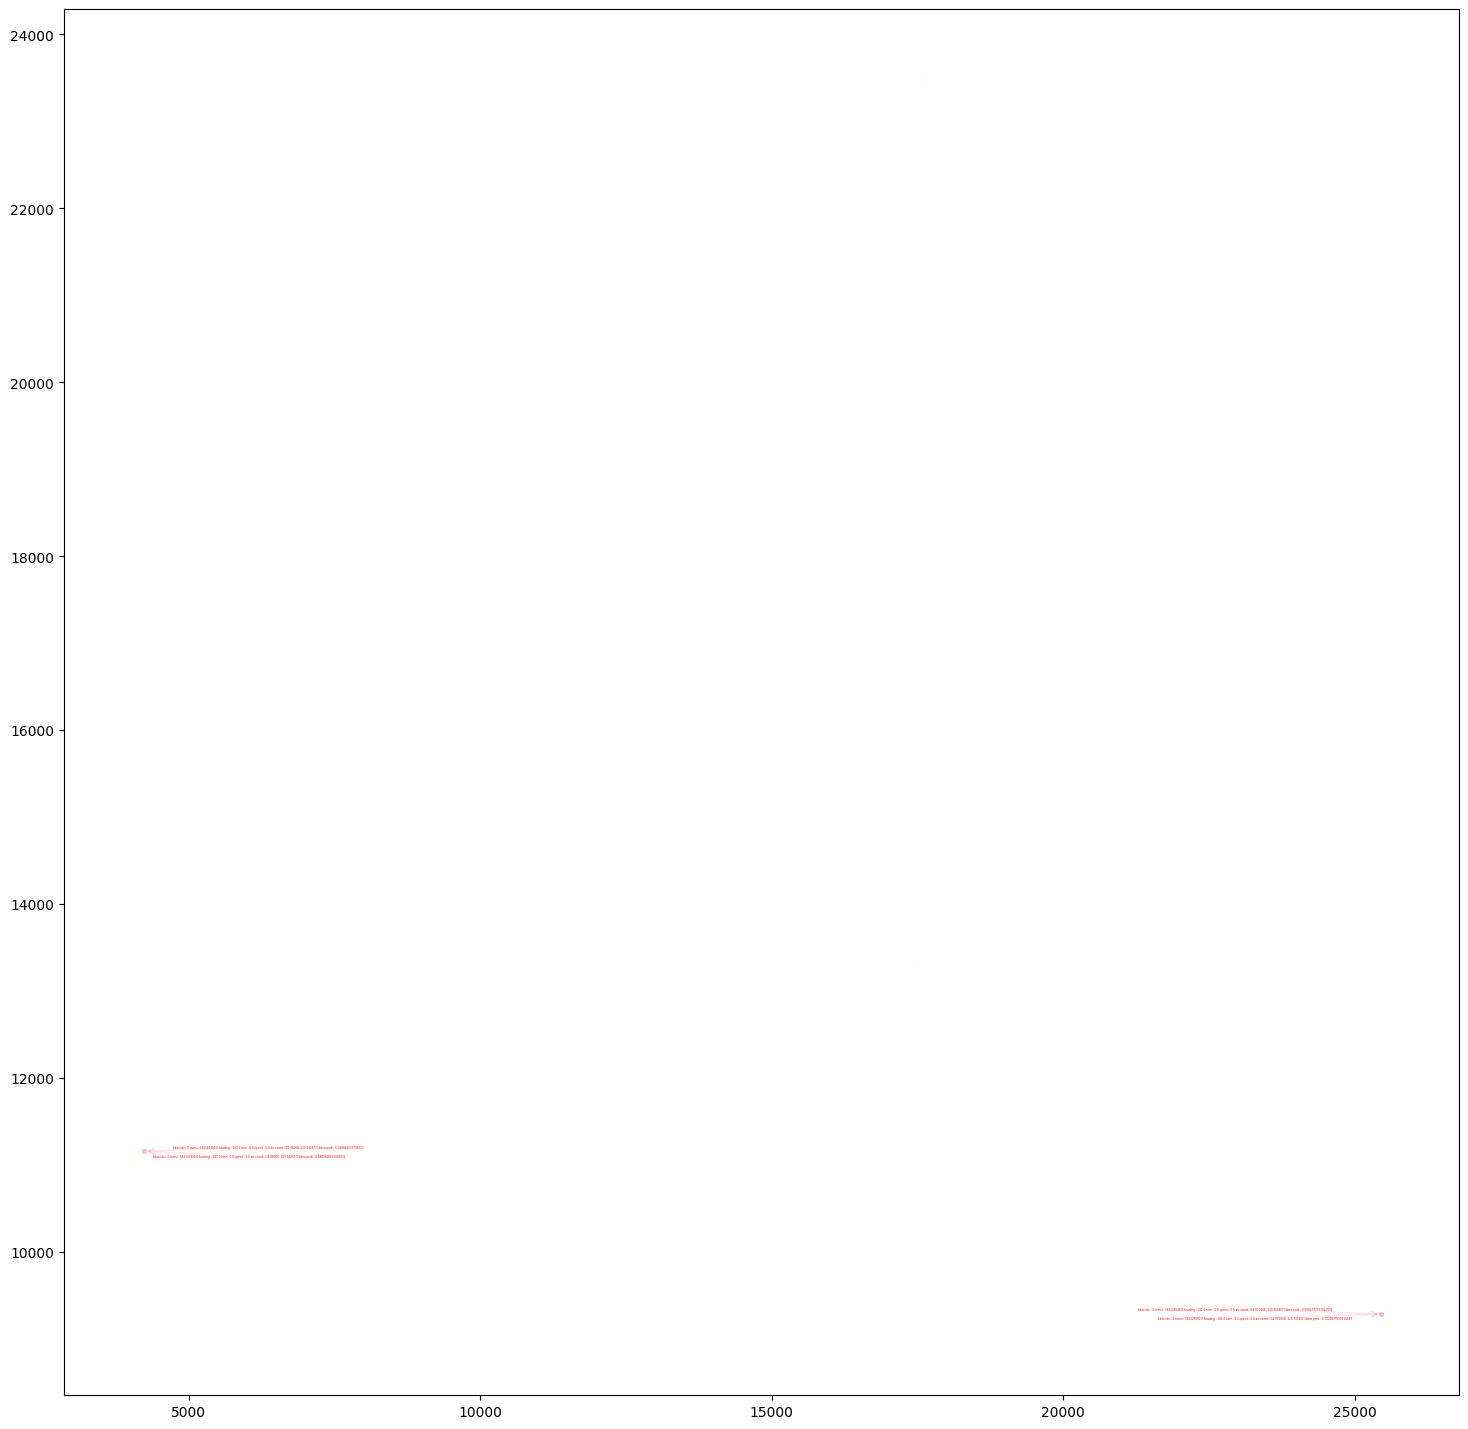

In [31]:
#------------------------------

# Code Backup ! 

#------------------------------
# AIS matching with Bbox

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
from PIL import Image
Image.MAX_IMAGE_PIXELS = 933120000
from adjustText import adjust_text

# Draw image 
img_path = args.img_path
img_ = Image.open(img_path)
plt.figure(figsize=(18,18))
#plt.imshow(img_)
ax = plt.gca()

# Bounding Box 
# Thresholding filtering 
bboxes_ = [] 
cnt = 0
for r in result[0]:
    if r[-1] > args.infer_threshold_showing:
        cnt+=1
        bboxes_.append(r)

#----------------------------------------------------- 
# BBox matching with AIS 

# Matched Bbox
idx_bboxes = []
x_bboxes = [] 
y_bboxes = []
width_bboxes = []
height_bboxes = []
angle_bboxes = []
prob_bboxes= []

# Matched AIS 
x_matched_ais = []
y_matched_ais = []
time_matched_ais = []
idxss_matched_ais = []
lat_matched_ais = []
long_matched_ais = []

mmsi_matched_ais = []
heading_matched_ais = []
turn_matched_ais = []
speed_matched_ais = []


# 데이터들은 q_df 써서 활용하는 것을 원칙으로 한다. 
x_ais = [i[1] for i in q_df["pixels"].values]
y_ais = [i[0] for i in q_df["pixels"].values]
lat_ais  = [i for i in q_df['lat'].values]
long_ais = [i for i in q_df['long'].values]
mmsi_ = [i for i in q_df['mmsi_'].values]
heading_ = [i for i in q_df['heading_'].values]
turn_ = [i for i in q_df['turn_'].values]
speed_ = [i for i in q_df['speed_'].values]

idx_ais = [i for i in q_df.index.values]
# debugged by Eric 
time_ais = [i for i in q_df['time']]


for bidx, box_ in enumerate( bboxes_):
    x = box_[0]
    y = box_[1]
    width =  box_[2]
    height = box_[3]
    angle_ = box_[4]
    prob_  = box_[5]
    

    # model 의 객체좌표가 center 중심인데, patches.Rectangle 은 좌하단을 기준점으로 보기 때문에. x,y 를 아래와 같이 shift 
    # roatate 할 때, 중심좌표 center 로 잡고, angle radian 변환해서 넣어주기 
    path_obj = patches.Rectangle((x-width*0.5,y-height*0.5), width, height, 
                                linewidth=0.1, edgecolor="yellow", fill=False,
                                rotation_point="center",
                                angle=angle_*180/np.pi,
                                alpha=0.35)
    
    ax.add_patch(path_obj)


    #--- find matched AIS with each box 
    cnt =0 
    for a,b,ix,t,lat_,long_,mmsi,heading,turn,speed in zip(x_ais,y_ais,idx_ais,time_ais, lat_ais,long_ais, mmsi_,heading_,turn_,speed_):
        
        # 각 bbox 범위안에 들어오는 ais 중에서 첫번쨰 ais 만 리스트에 저장 
        if cnt ==1:
            break

        # if bbox matched with ais 
        if (x - args.pixel_gap < a < x + args.pixel_gap) & (y - args.pixel_gap < b < y + args.pixel_gap) :
            
            idx_bboxes.append(bidx)
            x_bboxes.append(x)
            y_bboxes.append(y)
            width_bboxes.append(width)
            height_bboxes.append(height)
            angle_bboxes.append(angle_)
            prob_bboxes.append(prob_)

            #-- 
            x_matched_ais.append(a)
            y_matched_ais.append(b)
            time_matched_ais.append(t)
            idxss_matched_ais.append(ix)
            lat_matched_ais.append(lat_)
            long_matched_ais.append(long_)

            #-- 
            mmsi_matched_ais.append(mmsi) 
            heading_matched_ais.append(heading) 
            turn_matched_ais.append(turn) 
            speed_matched_ais.append(speed) 

            cnt+=1


#----------------------- indent over ! 
# 그렇다면 여기에서 통합된 bbox to ais csv 를 만들어버리자. 

if args.Box_Matching  == True:
    T_ = pd.DataFrame({
        "box index" : idx_bboxes,
        "bbox x coord" : x_bboxes,
        "bbox y coord" : y_bboxes,
        "bbox width" : width_bboxes,
        "bbox height" : height_bboxes,
        "bbox angle" : angle_bboxes,
        "bbox prob" : prob_bboxes,
        
        #-- ais
        "mmsi" : mmsi_matched_ais,
        "heading" : heading_matched_ais,
        "turn" : turn_matched_ais,
        "speed" : speed_matched_ais,

        "ais x coord(pixel)" : x_matched_ais,
        "ais y coord(pixel)" : y_matched_ais, 
        "ais lat"   : lat_matched_ais,
        "ais long"  : long_matched_ais,
        "ais time" : time_matched_ais
    })

    T_.drop_duplicates(inplace=True)

    S_ = {
        'box index':[i for i in range(len(bboxes_)) if i not in idx_bboxes],
        'bbox x coord' : [],
        'bbox y coord' : [],
        'bbox width' : [],
        'bbox height' : [],
        'bbox angle' :[],
        'bbox prob' : [],
        "ais x coord(pixel)" : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
        "ais y coord(pixel)" : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
        "ais lat"   : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
        "ais long"  : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
        "ais time" : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
        }

    not_include_boxes = [i for i in range(len(bboxes_)) if i not in idx_bboxes]

    for a in not_include_boxes:
        box_ = bboxes_[a]
        
        S_['bbox x coord'].append(box_[0])
        S_['bbox y coord'].append(box_[1])
        S_['bbox width'].append(box_[2])
        S_['bbox height'].append(box_[3])
        S_['bbox angle'].append(box_[4])
        S_['bbox prob'].append(box_[5])

    S_ = pd.DataFrame(S_)

    M_ = pd.concat([T_,S_])
    #del M_["box index"]
    M_.reset_index(inplace=True,drop=True)


    #----------------
    # Draw matched AIS 
    plt.scatter(x_matched_ais,y_matched_ais, alpha=0.1,color='red',marker='o',s=8)


    #--------------------------------------------
    # among the matched AIS (q_df), label and draw them 
    plt_txts = []

        
    for i,row in M_.iterrows():
        
        a = row['ais lat']
        b = row['ais long']
        c = row['mmsi']
        d = row['heading']
        e = row['turn']
        f = row['speed']
        g = row['bbox prob']

        x = row['ais x coord(pixel)']
        y = row['ais y coord(pixel)']


        if (x ==0) & (y ==0):
            x = row['bbox x coord']
            y = row['bbox y coord']
            name = f'bbox idx : {i}, No matched AIS point'

            #-- matched 가 되지 않은 박스들에는 레이블을 붙이지 않았음 
            #plt_txts.append( plt.text(x, y, name, fontsize =2,color='yellow') )

        else:
            name = f'bbox idx : {i} mmsi : {c} heading : {d} turn : {e} speed : {f} ais coord: {a,b} bbox prob : {g}'
            plt_txts.append( plt.text(x, y, name, fontsize =2,color='red') ) 


    #----------------------------------------
    # label overlap avoid 
    adjust_text(plt_txts, 
                force_points=3,
                arrowprops={'arrowstyle' : '->', 
                            'color' : 'crimson',  
                            'alpha' : 0.1}
                )
    # force_points = 3

#---------
# png save and draw
if args.png_draw_save:
    plt.imshow(img_)
    plt.savefig(args.img_output,dpi =1200 )
    plt.show()

# Code Backup ! 

In [32]:
M_

,box index,bbox x coord,bbox y coord,bbox width,bbox height,bbox angle,bbox prob,mmsi,heading,turn,speed,ais x coord(pixel),ais y coord(pixel),ais lat,ais long,ais time
0,1,4097.076172,11125.923828,180.539139,35.800365,0.306529,0.996863,563147400.0,287.0,0.0,5.8,4234,11160,34.960680,129.542577,2023-03-28 13:21:46
1,2,25601.837891,9331.139648,419.186310,59.371281,1.243405,0.996277,563126500.0,161.0,0.0,0.6,25459,9287,34.971668,129.705407,2023-03-28 13:17:47
2,4,4039.909424,11004.681641,191.237320,38.700008,0.290023,0.988360,563147400.0,287.0,0.0,5.8,4234,11160,34.960680,129.542577,2023-03-28 13:21:46
3,6,25541.554688,9120.798828,84.337074,59.553993,1.548373,0.702088,563126500.0,161.0,0.0,0.6,25459,9287,34.971668,129.705407,2023-03-28 13:17:47
4,0,17585.878906,23543.093750,194.138992,29.542868,0.078021,0.998864,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0
5,3,17544.943359,23439.041016,191.760101,44.037666,0.142806,0.992622,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0
6,5,17521.611328,13316.677734,30.493084,10.079847,-0.324709,0.909499,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0
7,7,25674.871094,9527.833984,12.163795,7.807026,1.434104,0.376468,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0


In [33]:
M_.iloc[0]['ais time']

'2023-03-28 13:21:46'

In [34]:
M_.to_csv(args.csv_output)
M_[0:10]

,box index,bbox x coord,bbox y coord,bbox width,bbox height,bbox angle,bbox prob,mmsi,heading,turn,speed,ais x coord(pixel),ais y coord(pixel),ais lat,ais long,ais time
0,1,4097.076172,11125.923828,180.539139,35.800365,0.306529,0.996863,563147400.0,287.0,0.0,5.8,4234,11160,34.960680,129.542577,2023-03-28 13:21:46
1,2,25601.837891,9331.139648,419.186310,59.371281,1.243405,0.996277,563126500.0,161.0,0.0,0.6,25459,9287,34.971668,129.705407,2023-03-28 13:17:47
2,4,4039.909424,11004.681641,191.237320,38.700008,0.290023,0.988360,563147400.0,287.0,0.0,5.8,4234,11160,34.960680,129.542577,2023-03-28 13:21:46
3,6,25541.554688,9120.798828,84.337074,59.553993,1.548373,0.702088,563126500.0,161.0,0.0,0.6,25459,9287,34.971668,129.705407,2023-03-28 13:17:47
4,0,17585.878906,23543.093750,194.138992,29.542868,0.078021,0.998864,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0
5,3,17544.943359,23439.041016,191.760101,44.037666,0.142806,0.992622,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0
6,5,17521.611328,13316.677734,30.493084,10.079847,-0.324709,0.909499,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0
7,7,25674.871094,9527.833984,12.163795,7.807026,1.434104,0.376468,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0


In [35]:
q_df

,mmsi_,time,long,lat,heading_,turn_,speed_,datetime,utm_array,pixels
0,563147400,2023-03-28 13:16:06,129.552472,34.957645,287,0.0,5.2,2023-03-28 13:16:06,"(550440.2186553384, 3868485.4122485407, 52, N)","(11634, 5528)"
1,563147400,2023-03-28 13:16:27,129.551923,34.957815,287,0.0,5.3,2023-03-28 13:16:27,"(550389.9908326971, 3868503.9879766945, 52, N)","(11607, 5456)"
2,563147400,2023-03-28 13:16:46,129.551368,34.957990,287,0.0,5.3,2023-03-28 13:16:46,"(550339.2123623741, 3868523.1154448395, 52, N)","(11580, 5383)"
3,563126500,2023-03-28 13:17:47,129.705407,34.971668,161,0.0,0.6,2023-03-28 13:17:47,"(564392.2978701022, 3870128.3661325225, 52, N)","(9287, 25459)"
4,563147400,2023-03-28 13:18:46,129.547907,34.959043,287,0.0,5.6,2023-03-28 13:18:46,"(550022.5841563953, 3868638.1532935007, 52, N)","(11416, 4931)"
5,563126500,2023-03-28 13:18:47,129.705620,34.971690,161,0.0,0.6,2023-03-28 13:18:47,"(564411.7244567686, 3870130.943138311, 52, N)","(9283, 25487)"
6,563147400,2023-03-28 13:19:46,129.546183,34.959583,287,0.0,5.6,2023-03-28 13:19:46,"(549864.8583613936, 3868697.176663455, 52, N)","(11331, 4706)"
7,563126500,2023-03-28 13:19:47,129.705832,34.971718,161,0.0,0.6,2023-03-28 13:19:47,"(564431.0550493455, 3870134.18493258, 52, N)","(9279, 25514)"
8,563147400,2023-03-28 13:20:06,129.545528,34.959785,287,1.0,5.6,2023-03-28 13:20:06,"(549804.93599558, 3868719.2514426494, 52, N)","(11300, 4620)"
9,563147400,2023-03-28 13:20:46,129.544388,34.960133,287,2.0,5.7,2023-03-28 13:20:46,"(549700.6464946065, 3868757.276418699, 52, N)","(11246, 4471)"


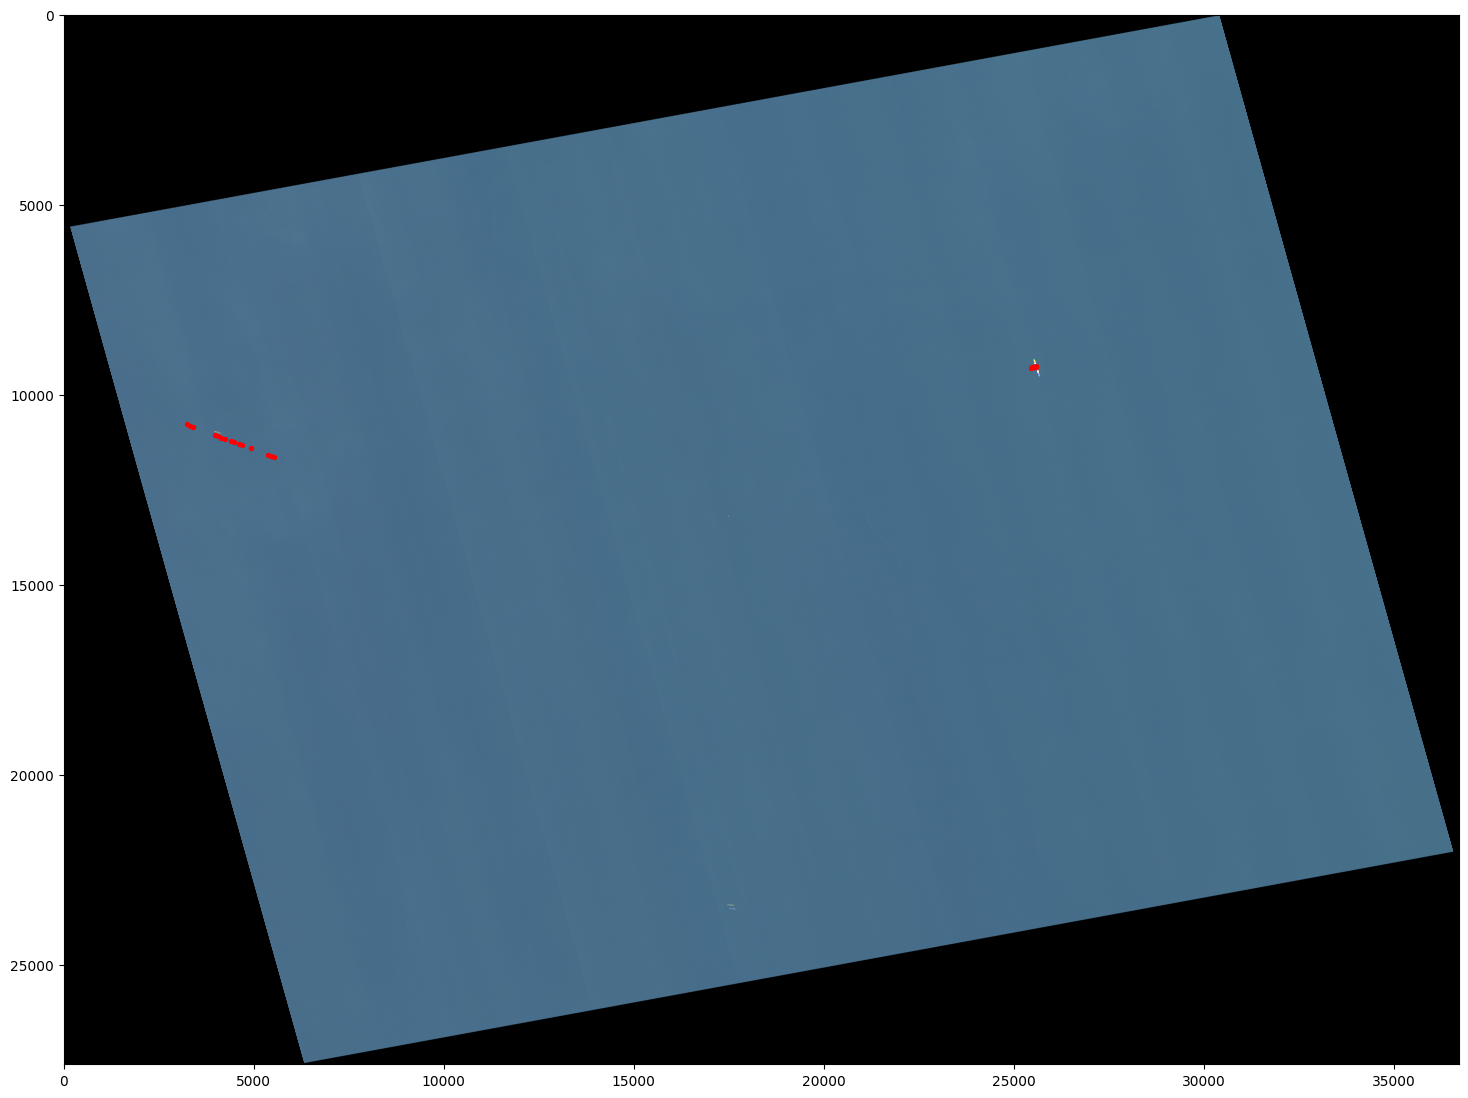

In [36]:
# Scatter Only 
# AIS 

plt.figure(figsize=(18,18))
plt.imshow(img_)
plt.scatter([i[1] for i in q_df['pixels']],[i[0] for i in q_df['pixels']], color='red',marker='o',s=8)

#plt.savefig(args.img_output_scatter,dpi =800)
plt.show()

# Masking BBox in the land 

In [37]:
args.map_path
os.path.exists(args.map_path)

True

------------------- Eric Edited 


<Axes: >

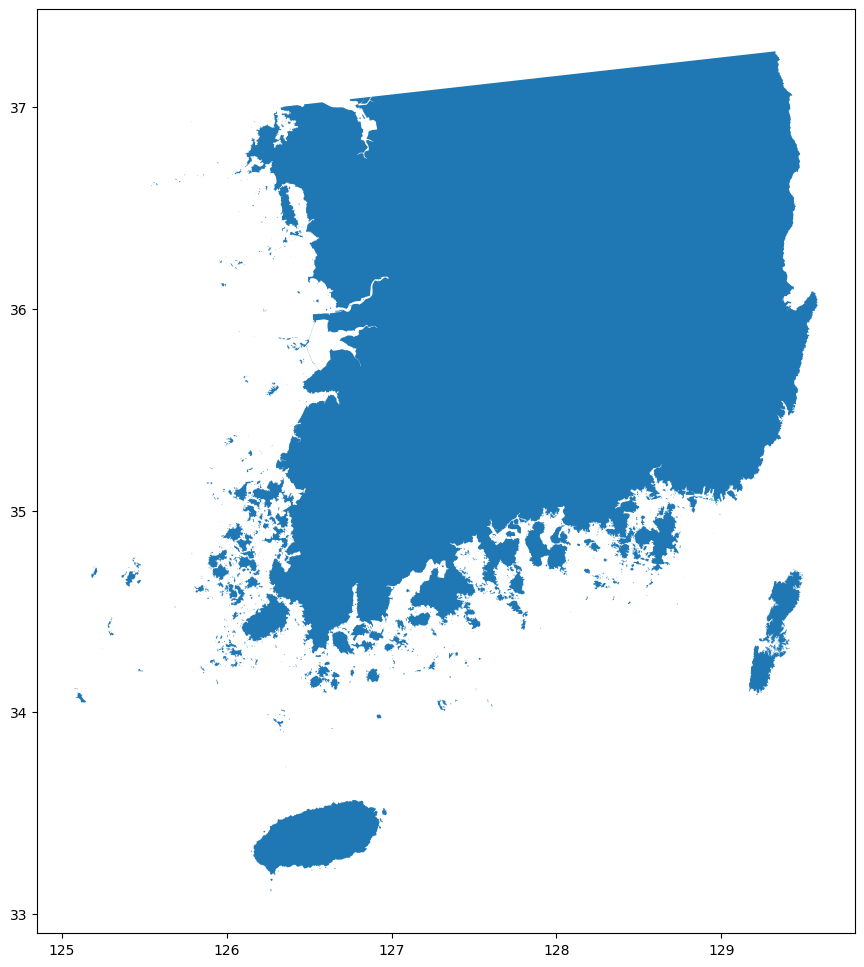

In [38]:
# Visualize Shape File !!
import geopandas as gpd
from shapely.geometry import Point
# Masking을 위한 shape 불러오기 
gdf=gpd.GeoDataFrame.from_file(args.map_path) #shapefile 불러오기

gpd.GeoSeries(gdf['geometry']).plot(figsize=(20,12)) #shapefile 플랏


In [39]:
import geopandas as gpd
from shapely.geometry import Point
# Masking을 위한 shape 불러오기 
gdf=gpd.GeoDataFrame.from_file(args.map_path) #shapefile 불러오기

# from pixel to utm
tmp_ =[] 
with rasterio.open(tf_path) as map_layer:
    for x,y in zip(M_['bbox x coord'].values, M_['bbox y coord'].values):
        
        x_coord,y_coord = map_layer.xy(y,x) # 여기 순서에 맞춰줘야, long,lat 좌표계가 맞음 
        tmp_.append([x_coord,y_coord])

tmp_1= []
ship_idxs = []
# from utm to latlon 
for idx,co in enumerate(tmp_):
    x,y = co[0],co[1]
    lat,lon = utm.to_latlon(x,y,52,"N")
    # print(lat,lon) # M_ 에서, 미리 설정되었던 AIS와 함께 좌표값 검증하였음

    print("progress : ", idx, " / ",len(tmp_))
    check=gdf['geometry'].contains(Point(lon,lat)) #특정 좌표 (long,lat)이 shapefile 다각형에 포함되는지 확인하기
    checkt=np.where(check == True)[0]
    
    if len(checkt) == 0:
        tmp_1.append(checkt)
        ship_idxs.append(idx)

progress :  0  /  8
progress :  1  /  8
progress :  2  /  8
progress :  3  /  8
progress :  4  /  8
progress :  5  /  8
progress :  6  /  8
progress :  7  /  8


In [40]:
# 마스킹하기 전, 탐색된 선박수
display(M_)

,box index,bbox x coord,bbox y coord,bbox width,bbox height,bbox angle,bbox prob,mmsi,heading,turn,speed,ais x coord(pixel),ais y coord(pixel),ais lat,ais long,ais time
0,1,4097.076172,11125.923828,180.539139,35.800365,0.306529,0.996863,563147400.0,287.0,0.0,5.8,4234,11160,34.960680,129.542577,2023-03-28 13:21:46
1,2,25601.837891,9331.139648,419.186310,59.371281,1.243405,0.996277,563126500.0,161.0,0.0,0.6,25459,9287,34.971668,129.705407,2023-03-28 13:17:47
2,4,4039.909424,11004.681641,191.237320,38.700008,0.290023,0.988360,563147400.0,287.0,0.0,5.8,4234,11160,34.960680,129.542577,2023-03-28 13:21:46
3,6,25541.554688,9120.798828,84.337074,59.553993,1.548373,0.702088,563126500.0,161.0,0.0,0.6,25459,9287,34.971668,129.705407,2023-03-28 13:17:47
4,0,17585.878906,23543.093750,194.138992,29.542868,0.078021,0.998864,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0
5,3,17544.943359,23439.041016,191.760101,44.037666,0.142806,0.992622,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0
6,5,17521.611328,13316.677734,30.493084,10.079847,-0.324709,0.909499,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0
7,7,25674.871094,9527.833984,12.163795,7.807026,1.434104,0.376468,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0


In [41]:
# visualize the result 
M_masked = M_.iloc[ship_idxs]
del M_masked['box index']
# sav the csv 
M_masked['box index'] = [i for i in range(len(M_masked))]
M_masked = M_masked.reset_index(drop=True)
M_masked.to_csv(args.csv_output_masked)
display(M_masked)

,bbox x coord,bbox y coord,bbox width,bbox height,bbox angle,bbox prob,mmsi,heading,turn,speed,ais x coord(pixel),ais y coord(pixel),ais lat,ais long,ais time,box index
0,4097.076172,11125.923828,180.539139,35.800365,0.306529,0.996863,563147400.0,287.0,0.0,5.8,4234,11160,34.960680,129.542577,2023-03-28 13:21:46,0
1,25601.837891,9331.139648,419.186310,59.371281,1.243405,0.996277,563126500.0,161.0,0.0,0.6,25459,9287,34.971668,129.705407,2023-03-28 13:17:47,1
2,4039.909424,11004.681641,191.237320,38.700008,0.290023,0.988360,563147400.0,287.0,0.0,5.8,4234,11160,34.960680,129.542577,2023-03-28 13:21:46,2
3,25541.554688,9120.798828,84.337074,59.553993,1.548373,0.702088,563126500.0,161.0,0.0,0.6,25459,9287,34.971668,129.705407,2023-03-28 13:17:47,3
4,17585.878906,23543.093750,194.138992,29.542868,0.078021,0.998864,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0,4
5,17544.943359,23439.041016,191.760101,44.037666,0.142806,0.992622,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0,5
6,17521.611328,13316.677734,30.493084,10.079847,-0.324709,0.909499,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0,6
7,25674.871094,9527.833984,12.163795,7.807026,1.434104,0.376468,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0,7


# Masked Visualization

/mnt/hdd/eric/.conda/envs/8.tmp/lib/python3.8/site-packages/PIL/Image.py:3176: DecompressionBombWarning: Image size (1014132288 pixels) exceeds limit of 933120000 pixels, could be decompression bomb DOS attack.
  warnings.warn(


#-------------- 0.1250
#-------------- 0.2500
#-------------- 0.3750
#-------------- 0.5000
#-------------- 0.6250
#-------------- 0.7500
#-------------- 0.8750
#-------------- 1.0000


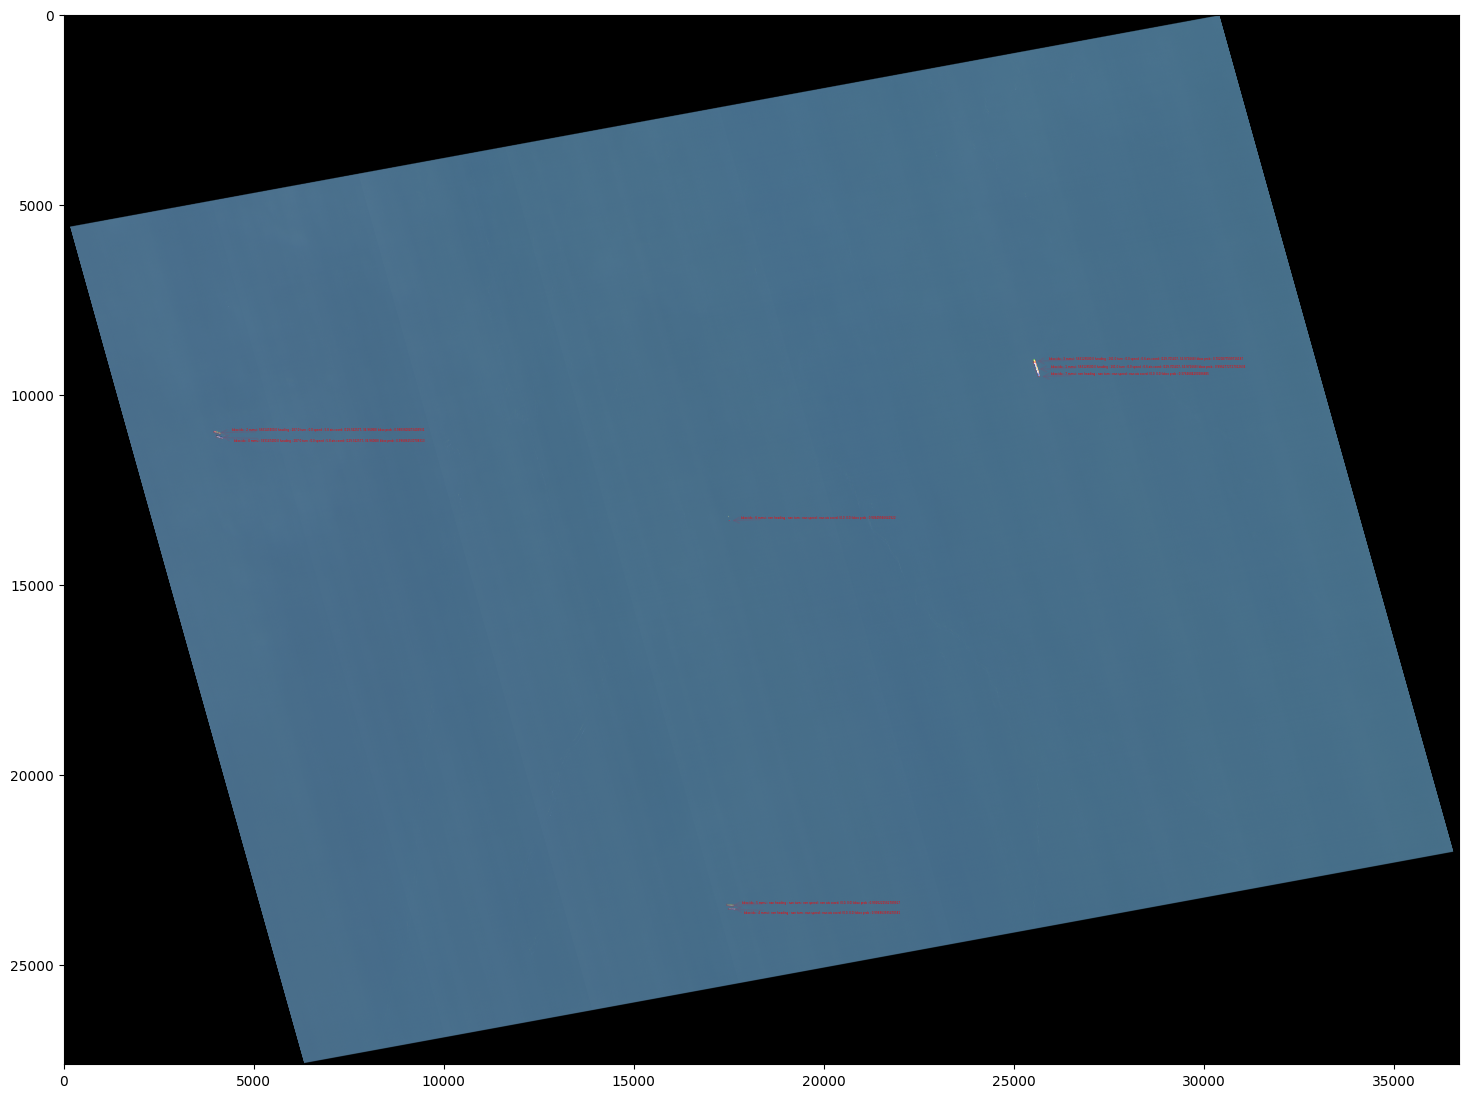

In [42]:
# visualize the result with masking 
# original image 
img_path = args.img_path
img_ = Image.open(img_path)

plt.figure(figsize=(18,18))
plt.imshow(img_)
ax = plt.gca()

#------------------------------------
# Bbox 
bboxes_ = [] 
cnt = 0
box_cnt = 0

# Label
plt_txts = []

# M_masked
for i,row in M_masked.iterrows():
    box_idx = row['box index']
    x = row['bbox x coord']
    y = row['bbox y coord']
    width = row['bbox width']
    height = row['bbox height']
    angle_ = row['bbox angle']
    prob_ = row['bbox prob']

    mmsi_ = row['mmsi']
    heading_ = row['heading']
    turn_ = row['turn']
    speed_ = row['speed']
    lat_ = row['ais lat']
    lon_ = row['ais long']

    
    
    box_cnt+=1
    print(f"#-------------- {box_cnt / len(M_masked):.4f}")
    path_obj = patches.Rectangle((x-width*0.5,y-height*0.5), width, height, linewidth=0.1, edgecolor="red", fill=False,
                                rotation_point="center",
                                angle=angle_*180/np.pi)
    
    ax.add_patch(path_obj)

    # if (lat_ ==0) & (lon_ ==0):
    #     pass
    # else:
    name = f'bbox idx : {box_idx} mmsi : {mmsi_} heading : {heading_} turn : {turn_} speed : {speed_} ais coord: {lon_,lat_} bbox prob : {prob_}'
    plt_txts.append( plt.text(x, y, name, fontsize =2,color='red') ) 


adjust_text(plt_txts, 
            force_points=3,
            arrowprops={'arrowstyle' : '->', 
                        'color' : 'crimson',  
                        'alpha' : 0.1}
            )
#------------------------------------

plt.imshow(img_)
#plt.savefig(args.img_output_masked,dpi =1200 )
plt.show()
#------------------------------------

# Extract Chips

In [43]:
# #----- load 
# img_path = args.img_path
# M_chip = pd.read_csv(args.csv_output_masked)

# img_part = Image.open(img_path)
# prefix_ = args.img_path.split("/")[-1].replace(".png","")

# a= os.path.dirname(args.img_path)
# chip_folder = os.path.join(a,"chips")

# if os.path.exists(chip_folder):
#     print("folder exists")
# else:
#     os.mkdir(chip_folder)
#     print("folder created")

In [44]:
#M_chip

In [45]:
#prefix_

In [46]:

# print("#--------------------",len(M_))
# for i,row in M_chip.iterrows():

#     if row["ais time"] != str(0):
#         print({i})
#         box_ = row
#         x = box_["bbox x coord"]
#         y = box_["bbox y coord"]
#         width =  box_["bbox width"]
#         height = box_["bbox height"]
#         angle_ = box_["bbox angle"]
#         box_idx = box_['box index']

#         pixel_slice = 512
#         a_ = img_part.crop(( x-pixel_slice , y-pixel_slice, x+pixel_slice , y+pixel_slice ))
#         #plt.figure(figsize=(18,18))
        
#         folder_ = chip_folder
#         saved_name = f"{box_idx}_{prefix_}.png"
        
        
#         #plt.figure(figsize=(18,18))
#         #plt.savefig(os.path.join(folder_,saved_name),dpi =600 )
#         a_.save(os.path.join(folder_,saved_name))
#         plt.imshow(a_)
    

In [47]:
# import subprocess


# zip_command = ["zip", "-jr","chips_v2.zip", folder_]

# try:    
#     subprocess.run(zip_command, check=True,cwd=folder_.replace("/chips",""))
#     print("Zip operation successful.")
# except subprocess.CalledProcessError as e:
#     print(f"Error during zip operation: {e}")